In [1]:
!pip install selectivesearch
!pip install torch_snippets
from torch_snippets import *
import selectivesearch
from skimage.segmentation import felzenszwalb

  Created wheel for selectivesearch: filename=selectivesearch-0.4-py3-none-any.whl size=4360 sha256=1b87becfda34e27f3e630718361cdbcd847f854ccca8fea5709bc2af8caf12a8
  Stored in directory: /home/pedro/.cache/pip/wheels/66/4e/88/6de23ce74be839a953498c4ebdfa809ad7da9422ac89ae856c
Successfully built selectivesearch


In [2]:
!wget https://www.dropbox.com/s/l98leemr7r5stnm/Hemanvi.jpeg
img = read('Hemanvi.jpeg', 1)

--2020-12-14 16:40:46--  https://www.dropbox.com/s/l98leemr7r5stnm/Hemanvi.jpeg
Resolving www.dropbox.com (www.dropbox.com)... 162.125.68.18, 2620:100:6023:18::a27d:4312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.68.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/l98leemr7r5stnm/Hemanvi.jpeg [following]
--2020-12-14 16:40:47--  https://www.dropbox.com/s/raw/l98leemr7r5stnm/Hemanvi.jpeg
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc686ba74ef5fe4566e6b7f3e164.dl.dropboxusercontent.com/cd/0/inline/BFHZA7btO4Th3jBjVxlZRlKV13O0gafUDFTi04IH56SEFR58c_ciXXJA3m2FCqhEi0QfogrqlMqjKlsRI9ahfoPtwHIgK0kJ_xKbjIdQKd_gmw/file# [following]
--2020-12-14 16:40:47--  https://uc686ba74ef5fe4566e6b7f3e164.dl.dropboxusercontent.com/cd/0/inline/BFHZA7btO4Th3jBjVxlZRlKV13O0gafUDFTi04IH56SEFR58c_ciXXJA3m2FCqhEi0QfogrqlMqjKlsRI9ahfoPtwHIgK0kJ_xKbjIdQKd_gmw/file
Resolving uc6

In [3]:
segments_fz = felzenszwalb(img, scale=200)

2020-12-14 16:41:24.992 | INFO     | torch_snippets.loader:subplots:385 - plotting 2 images in a grid of 1x2 @ (5, 5)


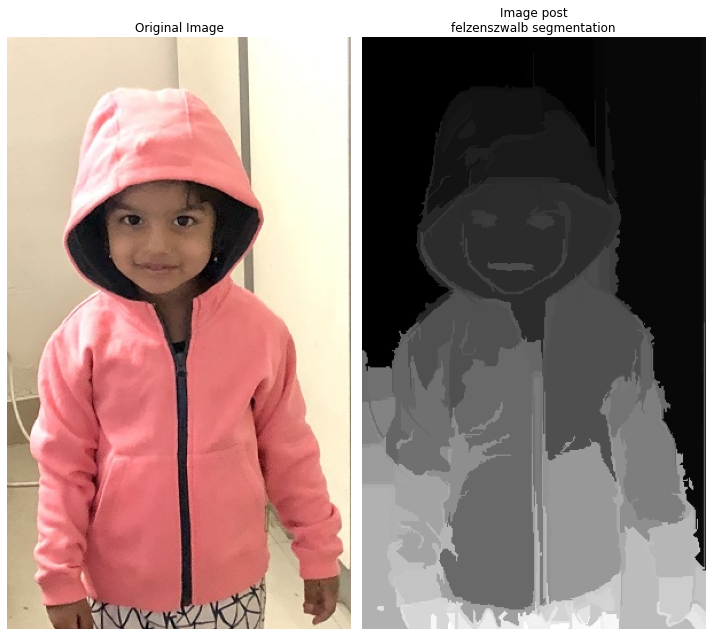

In [4]:
subplots([img, segments_fz], \
         titles=['Original Image',\
                 'Image post\nfelzenszwalb segmentation'],\
         sz=10, nc=2)

In [5]:
def extract_candidates(img):
    img_lbl, regions = selectivesearch.selective_search(img, scale=200, min_size=100)
    img_area = np.prod(img.shape[:2])
    candidates = []
    for r in regions:
        if r['rect'] in candidates: continue
        if r['size'] < (0.05*img_area): continue
        if r['size'] > (img_area): continue
        x, y, w, h = r['rect']
        candidates.append(list(r['rect']))
    return candidates

In [6]:
!pip install selectivesearch
!pip install torch_snippets
from torch_snippets import *
import selectivesearch
!wget https://www.dropbox.com/s/l98leemr7r5stnm/Hemanvi.jpeg
img = read('Hemanvi.jpeg', 1)

--2020-12-14 16:45:53--  https://www.dropbox.com/s/l98leemr7r5stnm/Hemanvi.jpeg
Resolving www.dropbox.com (www.dropbox.com)... 162.125.68.18, 2620:100:6023:18::a27d:4312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.68.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/l98leemr7r5stnm/Hemanvi.jpeg [following]
--2020-12-14 16:45:53--  https://www.dropbox.com/s/raw/l98leemr7r5stnm/Hemanvi.jpeg
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc686ba74ef5fe4566e6b7f3e164.dl.dropboxusercontent.com/cd/0/inline/BFHZA7btO4Th3jBjVxlZRlKV13O0gafUDFTi04IH56SEFR58c_ciXXJA3m2FCqhEi0QfogrqlMqjKlsRI9ahfoPtwHIgK0kJ_xKbjIdQKd_gmw/file# [following]
--2020-12-14 16:45:54--  https://uc686ba74ef5fe4566e6b7f3e164.dl.dropboxusercontent.com/cd/0/inline/BFHZA7btO4Th3jBjVxlZRlKV13O0gafUDFTi04IH56SEFR58c_ciXXJA3m2FCqhEi0QfogrqlMqjKlsRI9ahfoPtwHIgK0kJ_xKbjIdQKd_gmw/file
Resolving uc6

Connecting to uc686ba74ef5fe4566e6b7f3e164.dl.dropboxusercontent.com (uc686ba74ef5fe4566e6b7f3e164.dl.dropboxusercontent.com)|162.125.68.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 53839 (53K) [image/jpeg]
Saving to: ‘Hemanvi.jpeg.3’

Hemanvi.jpeg.3      100%[===================>]  52,58K  --.-KB/s    in 0,03s   

2020-12-14 16:45:54 (1,59 MB/s) - ‘Hemanvi.jpeg.3’ saved [53839/53839]



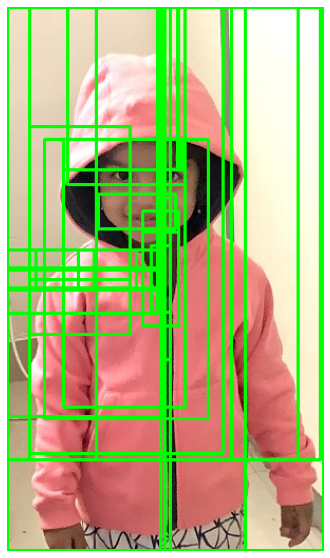

In [7]:
candidates = extract_candidates(img)
show(img, bbs=candidates)

In [9]:
def get_iou(boxA, boxB, epsilon=1e-5):
    x1 = max(boxA[0], boxB[0])
    y1 = max(boxA[1], boxB[1])
    x2 = min(boxA[2], boxB[2])
    y2 = min(boxA[3], boxB[3])
    width = x2 - x1
    height = y2 - y1
    if (width < 0) or (height<0):
        return 0.0
    area_overlap = width * height
    area_a = (boxA[2] - boxA[0]) * (boxA[3] - boxA[1])
    area_b = (boxB[2] - boxB[0]) * (boxB[3] - boxB[1])
    area_combine = area_a + area_b + area_overlap
    return area_overlap / (area_combine + epsilon)

In [10]:
from torch_snippets import *
import selectivesearch

In [11]:
!kaggle datasets download -d sixhky/open-images-bus-trucks/

 98%|███████████████████████████████████████▎| 361M/367M [00:32<00:00, 18.7MB/s]
100%|████████████████████████████████████████| 367M/367M [00:32<00:00, 11.8MB/s]


In [12]:
!unzip -qq open-images-bus-trucks.zip

In [13]:
from torchvision import transforms, models, datasets
from torch_snippets import Report
from torchvision.ops import nms
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

In [14]:
IMAGE_ROOT = 'images/images'
DF_RAW = pd.read_csv('df.csv')
print(DF_RAW.head())

            ImageID  Source LabelName  Confidence      XMin      XMax  \
0  0000599864fd15b3  xclick       Bus           1  0.343750  0.908750   
1  00006bdb1eb5cd74  xclick     Truck           1  0.276667  0.697500   
2  00006bdb1eb5cd74  xclick     Truck           1  0.702500  0.999167   
3  00010bf498b64bab  xclick       Bus           1  0.156250  0.371250   
4  00013f14dd4e168f  xclick       Bus           1  0.287500  0.999375   

       YMin      YMax  IsOccluded  IsTruncated  ...  IsDepiction  IsInside  \
0  0.156162  0.650047           1            0  ...            0         0   
1  0.141604  0.437343           1            0  ...            0         0   
2  0.204261  0.409774           1            1  ...            0         0   
3  0.269188  0.705228           0            0  ...            0         0   
4  0.194184  0.999062           0            1  ...            0         0   

   XClick1X  XClick2X  XClick3X  XClick4X  XClick1Y  XClick2Y  XClick3Y  \
0  0.421875  0.34

In [16]:
class OpenImages(Dataset):
    def __init__(self, df, image_folder=IMAGE_ROOT):
        self.root = image_folder
        self.df = df
        self.unique_images = df['ImageID'].unique()
    def __len__(self): return len(self.unique_images)
    def __getitem__(self, ix):
        image_id = self.unique_images[ix]
        image_path = f'{self.root}/{image_id}.jpg'
        # Convert BGR to RGB
        image = cv2.imread(image_path, 1)[...,::-1] 
        h, w, _ = image.shape
        df = self.df.copy()
        df = df[df['ImageID'] == image_id]
        boxes = df['XMin,YMin,XMax,YMax'.split(',')].values
        boxes = (boxes*np.array([w,h,w,h])).astype(np.uint16)\
                                           .tolist()
        classes = df['LabelName'].values.tolist()
        return image, boxes, classes, image_path

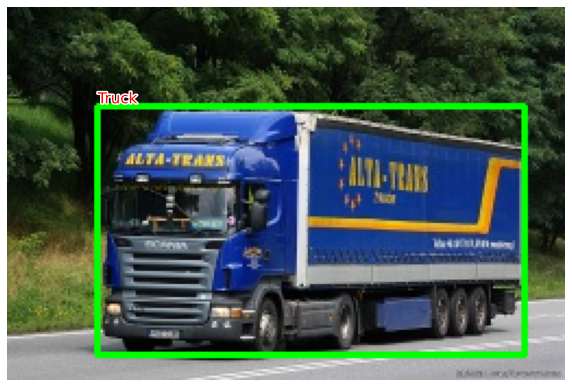

In [17]:
ds = OpenImages(df=DF_RAW)
im, bbs, clss, _ = ds[9]
show(im, bbs=bbs, texts=clss, sz=10)

In [18]:
def extract_candidates(img):
    img_lbl,regions = selectivesearch.selective_search(img, \
                                    scale=200, min_size=100)
    img_area = np.prod(img.shape[:2])
    candidates = []
    for r in regions:
        if r['rect'] in candidates: continue
        if r['size'] < (0.05*img_area): continue
        if r['size'] > (1*img_area): continue
        x, y, w, h = r['rect']
        candidates.append(list(r['rect']))
    return candidates
def extract_iou(boxA, boxB, epsilon=1e-5):
    x1 = max(boxA[0], boxB[0])
    y1 = max(boxA[1], boxB[1])
    x2 = min(boxA[2], boxB[2])
    y2 = min(boxA[3], boxB[3])
    width = (x2 - x1)
    height = (y2 - y1)
    if (width<0) or (height <0):
        return 0.0
    area_overlap = width * height
    area_a = (boxA[2] - boxA[0]) * (boxA[3] - boxA[1])
    area_b = (boxB[2] - boxB[0]) * (boxB[3] - boxB[1])
    area_combined = area_a + area_b - area_overlap
    iou = area_overlap / (area_combined+epsilon)
    return iou

In [19]:
FPATHS, GTBBS, CLSS, DELTAS, ROIS, IOUS = [],[],[],[],[],[]

In [ ]:
for ix, (im, bbs, labels, fpath) in enumerate(ds):
    H, W, _ = im.shape
    candidates = extract_candidates(im)
    candidates = np.array([(x,y,x+w,y+h) for x,y,w,h in candidates])
    ious, rois, clss, deltas = [], [], [], []
    ious = np.array([[extract_iou(candidate, _bb_) for candidate in candidates] for _bb_ in bbs]).T
    for jx, candidate in enumerate(candidates):
        cx,cy,cX,cY = candidate
        candidate_ious = ious[jx]
        best_iou_at = np.argmax(candidate_ious)
        best_iou = candidate_ious[best_iou_at]
        best_bb = _x,_y,_X,_Y = bbs[best_iou_at]
        if best_iou > 0.3: clss.append(labels[best_iou_at])
        else: clss.append('background')
        delta = np.array([_x-cx, _y-cy, _X-cX, _Y-cY]) / np.array([W,H,W,H])
        deltas.append(delta)
        rois.append(candidate / np.array([W,H,W,H]))
    FPATHS.append(fpath)
    IOUS.append(ious)
    ROIS.append(rois)
    CLSS.append(clss)
    DELTAS.append(deltas)
    GTBBS.append(bbs)
    
FPATHS = [f'{IMAGE_ROOT}/{stem(f)}.jpg' for f in FPATHS] 
FPATHS, GTBBS, CLSS, DELTAS, ROIS = [item for item in [FPATHS, GTBBS, CLSS, DELTAS, ROIS]]

In [ ]:
targets = pd.DataFrame(flatten(CLSS), columns=['label'])
label2target = {l:t for t,l in \
                enumerate(targets['label'].unique())}
target2label = {t:l for l,t in label2target.items()}
background_class = label2target['background']

In [ ]:
normalize= transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])

In [ ]:
def preprocess_image(img):
    img = torch.tensor(img).permute(2,0,1)
    img = normalize(img)
    return img.to(device).float()

In [ ]:
def decode(_y):
    _, preds = _y.max(-1)
    return preds

In [ ]:
class RCNNDataset(Dataset):
    def __init__(self, fpaths, rois, labels, deltas, gtbbs):
        self.fpaths = fpaths
        self.gtbbs = gtbbs
        self.rois = rois
        self.labels = labels
        self.deltas = deltas
    def __len__(self): return len(self.fpaths)
    def __getitem__(self, ix):
        fpath = str(self.fpaths[ix])
        image = cv2.imread(fpath, 1)[...,::-1]
        H, W, _ = image.shape
        sh = np.array([W,H,W,H])
        gtbbs = self.gtbbs[ix]
        rois = self.rois[ix]
        bbs = (np.array(rois)*sh).astype(np.uint16)
        labels = self.labels[ix]
        deltas = self.deltas[ix]
        crops = [image[y:Y,x:X] for (x,y,X,Y) in bbs]
        return image,crops,bbs,labels,deltas,gtbbs,fpath
    def collate_fn(self, batch):
        inp, rois, rixs, labels, deltas =[],[],[],[],[]
        for ix in range(len(batch)):
            image, crops, image_bbs, image_labels, \
                image_deltas, image_gt_bbs, \
                image_fpath = batch[ix]
            crops = [cv2.resize(crop, (224,224)) \
                     for crop in crops]
            crops = [preprocess_image(crop/255.)[None] \
                     for crop in crops]
            inp.extend(crops)
            labels.extend([label2target[c] \
                           for c in image_labels])
            deltas.extend(image_deltas)
        inp = torch.cat(inp).to(device)
        labels = torch.Tensor(labels).long().to(device)
        deltas = torch.Tensor(deltas).float().to(device)
        return inp, labels, deltas

In [ ]:
n_train = 9*len(FPATHS)//10
train_ds = RCNNDataset(FPATHS[:n_train], ROIS[:n_train], \
                       CLSS[:n_train], DELTAS[:n_train], \
                       GTBBS[:n_train])
test_ds = RCNNDataset(FPATHS[n_train:], ROIS[n_train:], \
                      CLSS[n_train:], DELTAS[n_train:], \
                      GTBBS[n_train:])

from torch.utils.data import TensorDataset, DataLoader
train_loader = DataLoader(train_ds, batch_size=2, \
                          collate_fn=train_ds.collate_fn, \
                          drop_last=True)
test_loader = DataLoader(test_ds, batch_size=2, \
                         collate_fn=test_ds.collate_fn, \
                         drop_last=True)

In [ ]:
vgg_backbone = models.vgg16(pretrained=True)
vgg_backbone.classifier = nn.Sequential()
for param in vgg_backbone.parameters():
    param.requires_grad = False
vgg_backbone = vgg_backbone.eval().to(device)

In [ ]:
class RCNN(nn.Module):
    def __init__(self):
        super(RCNN, self).__init__()
        feature_dim = 25088
        self.backbone = vgg_backbone
        self.cls_score = nn.Linear(feature_dim, \
                                    len(label2target))
        self.bbox = nn.Sequential(
                          nn.Linear(feature_dim, 512),
                          nn.ReLU(),
                          nn.Linear(512, 4),
                          nn.Tanh(),
                        )
        self.cel = nn.CrossEntropyLoss()
        self.sl1 = nn.L1Loss()
        
    def forward(self, input):
        feat = self.backbone(input)
        cls_score = self.cls_score(feat)
        bbox = self.bbox(feat)
        return cls_score, bbox   
    def calc_loss(self, probs, _deltas, labels, deltas):
        detection_loss = self.cel(probs, labels)
        ixs, = torch.where(labels != 0)
        _deltas = _deltas[ixs]
        deltas = deltas[ixs]
        self.lmb = 10.0
        if len(ixs) > 0:
            regression_loss = self.sl1(_deltas, deltas)
            return detection_loss + self.lmb *\
                regression_loss, detection_loss.detach(), \
                regression_loss.detach()
        else:
            regression_loss = 0
            return detection_loss + self.lmb *\
                regression_loss, detection_loss.detach(), \
                regression_loss   
        

In [ ]:
def train_batch(inputs, model, optimizer, criterion):
    input, clss, deltas = inputs
    model.train()
    optimizer.zero_grad()
    _clss, _deltas = model(input)
    loss, loc_loss, regr_loss = criterion(_clss, _deltas, \
                                            clss, deltas)
    accs = clss == decode(_clss)
    loss.backward()
    optimizer.step()
    return loss.detach(), loc_loss, regr_loss, \
        accs.cpu().numpy()

In [ ]:
@torch.no_grad()
def validate_batch(inputs, model, criterion):
    input, clss, deltas = inputs
    with torch.no_grad():
        model.eval()
        _clss,_deltas = model(input)
        loss,loc_loss,regr_loss = criterion(_clss, _deltas, \
                                               clss, deltas)
        _, _clss = _clss.max(-1)
        accs = clss == _clss
    return _clss,_deltas,loss.detach(),loc_loss, regr_loss, \
         accs.cpu().numpy()

In [ ]:
rcnn = RCNN().to(device)
criterion = rcnn.calc_loss
optimizer = optim.SGD(rcnn.parameters(), lr=1e-3)
n_epochs = 5
log = Report(n_epochs)

In [ ]:
for epoch in range(n_epochs):

    _n = len(train_loader)
    for ix, inputs in enumerate(train_loader):
        loss, loc_loss,regr_loss,accs = train_batch(inputs, \
                                  rcnn, optimizer, criterion)
        pos = (epoch + (ix+1)/_n)
        log.record(pos, trn_loss=loss.item(), \
                   trn_loc_loss=loc_loss, \
                   trn_regr_loss=regr_loss, \
                   trn_acc=accs.mean(), end='\r')
        
    _n = len(test_loader)
    for ix,inputs in enumerate(test_loader):
        _clss, _deltas, loss, \
        loc_loss, regr_loss, \
        accs = validate_batch(inputs, rcnn, criterion)
        pos = (epoch + (ix+1)/_n)
        log.record(pos, val_loss=loss.item(), \
                val_loc_loss=loc_loss, \
                val_regr_loss=regr_loss, \
                val_acc=accs.mean(), end='\r')

# Plotting training and validation metrics
log.plot_epochs('trn_loss,val_loss'.split(','))


In [ ]:
def test_predictions(filename, show_output=True):
    img = np.array(cv2.imread(filename, 1)[...,::-1])
    candidates = extract_candidates(img)
    candidates = [(x,y,x+w,y+h) for x,y,w,h in candidates]
    inp = []
    for candidate in candidates:
        x,y,X,Y = candidate
        crop = cv2.resize(img[y:Y,x:X], (224,224))
        inp.append(preprocess_image(crop/255.)[None])
    inp = torch.cat(inp).to(device)
    with torch.no_grad():
        rcnn.eval()
        probs, deltas = rcnn(input)
        probs = torch.nn.functional.softmax(probs, -1)
        confs, clss = torch.max(probs, -1)
    candidates = np.array(candidates)
    confs,clss,probs,deltas =[tensor.detach().cpu().numpy() \
                                  for tensor in [confs, \
                                        clss, probs, deltas]]

    ixs = clss!=background_class
    confs, clss,probs,deltas,candidates = [tensor[ixs] for \
           tensor in [confs,clss, probs, deltas,candidates]]
    bbs = (candidates + deltas).astype(np.uint16)
    ixs = nms(torch.tensor(bbs.astype(np.float32)), \
                torch.tensor(confs), 0.05)
    confs,clss,probs,deltas,candidates,bbs = [tensor[ixs] \
                                            for tensor in \
                            [confs, clss, probs, deltas, \
                            candidates, bbs]]
    if len(ixs) == 1:
        confs, clss, probs, deltas, candidates, bbs = \
                [tensor[None] for tensor in [confs, clss,
                            probs, deltas, candidates, bbs]]
    if len(confs) == 0 and not show_output:
        return (0,0,224,224), 'background', 0
    if len(confs) > 0:
        best_pred = np.argmax(confs)
        best_conf = np.max(confs)
        best_bb = bbs[best_pred]
        x,y,X,Y = best_bb
    _, ax = plt.subplots(1, 2, figsize=(20,10))
    show(img, ax=ax[0])
    ax[0].grid(False)
    ax[0].set_title('Original image')
    if len(confs) == 0:
        ax[1].imshow(img)
        ax[1].set_title('No objects')
        plt.show()
        return
    ax[1].set_title(target2label[clss[best_pred]])
    show(img, bbs=bbs.tolist(), 
        texts=[target2label[c] for c in clss.tolist()], 
        ax=ax[1], title='predicted bounding box and class')
    plt.show()
    return (x,y,X,Y),target2label[clss[best_pred]],best_conf


In [ ]:
image, crops, bbs, labels, deltas, gtbbs, fpath = test_ds[7]
test_predictions(fpath)

In [ ]:
class FRCNNDataset(Dataset):
    def __init__(self, fpaths, rois, labels, deltas, gtbbs):
        self.fpaths = fpaths
        self.gtbbs = gtbbs
        self.rois = rois
        self.labels = labels
        self.deltas = deltas
    def __len__(self): return len(self.fpaths)
    def __getitem__(self, ix):
        fpath = str(self.fpaths[ix])
        image = cv2.imread(fpath, 1)[...,::-1]
        gtbbs = self.gtbbs[ix]
        rois = self.rois[ix]
        labels = self.labels[ix]
        deltas = self.deltas[ix]
        assert len(rois) == len(labels) == len(deltas), \
            f'{len(rois)}, {len(labels)}, {len(deltas)}'
        return image, rois, labels, deltas, gtbbs, fpath

    def collate_fn(self, batch):
        input, rois, rixs, labels, deltas = [],[],[],[],[]
        for ix in range(len(batch)):
            image, image_rois, image_labels, image_deltas, \
                image_gt_bbs, image_fpath = batch[ix]
            image = cv2.resize(image, (224,224))
            input.append(preprocess_image(image/255.)[None])
            rois.extend(image_rois)
            rixs.extend([ix]*len(image_rois))
            labels.extend([label2target[c] for c in \
                                image_labels])
            deltas.extend(image_deltas)
        input = torch.cat(input).to(device)
        rois = torch.Tensor(rois).float().to(device)
        rixs = torch.Tensor(rixs).float().to(device)
        labels = torch.Tensor(labels).long().to(device)
        deltas = torch.Tensor(deltas).float().to(device)
        return input, rois, rixs, labels, deltas


In [ ]:
n_train = 9*len(FPATHS)//10
train_ds = FRCNNDataset(FPATHS[:n_train], ROIS[:n_train], \
                        CLSS[:n_train], DELTAS[:n_train], \
                        GTBBS[:n_train])
test_ds = FRCNNDataset(FPATHS[n_train:], ROIS[n_train:], \
                       CLSS[n_train:], DELTAS[n_train:], \
                       GTBBS[n_train:])

from torch.utils.data import TensorDataset, DataLoader
train_loader = DataLoader(train_ds, batch_size=2, \
                          collate_fn=train_ds.collate_fn, \
                          drop_last=True)
test_loader = DataLoader(test_ds, batch_size=2, \
                         collate_fn=test_ds.collate_fn, \
                         drop_last=True)

In [ ]:
from torchvision.ops import RoIPool

In [ ]:
class FRCNN(nn.Module):
    def __init__(self):
        super(FRCNN, self).__init__()
        rawnet = torchvision.models.vgg16_bn(pretrained=True)
        for param in rawnet.features.parameters():
            param.requires_grad = False
            
        self.seq = nn.Sequential(*list(\
                            rawnet.features.children())[:-1])
        self.roipool = RoIPool(7, spatial_scale=14/224)
        feature_dim = 512*7*7
        self.cls_score = nn.Linear(feature_dim, \
                                   len(label2target))
        self.bbox = nn.Sequential(
                          nn.Linear(feature_dim, 512),
                          nn.ReLU(),
                          nn.Linear(512, 4),
                          nn.Tanh(),
                        )
        self.cel = nn.CrossEntropyLoss()
        self.sl1 = nn.L1Loss()
        
    def forward(self, inp, rois, ridx):
        res = inp
        res = self.seq(res)
        rois = torch.cat([ridx.unsqueeze(-1), rois*224], \
                            dim=-1)
        res = self.roipool(res, rois)
        feat = res.view(len(res), -1)
        cls_score = self.cls_score(feat)
        bbox=self.bbox(feat)#.view(-1,len(label2target),4)
        return cls_score, bbox
    def calc_loss(self, probs, _deltas, labels, deltas):
        detection_loss = self.cel(probs, labels)
        ixs, = torch.where(labels != background_class)
        _deltas = _deltas[ixs]
        deltas = deltas[ixs]
        self.lmb = 10.0
        if len(ixs) > 0:
            regression_loss = self.sl1(_deltas, deltas)
            return detection_loss +\
                self.lmb * regression_loss, \
                detection_loss.detach(), \
                regression_loss.detach()
        else:
            regression_loss = 0
            return detection_loss + \
                self.lmb * regression_loss, \
                detection_loss.detach(), \
                regression_loss

In [ ]:
def train_batch(inputs, model, optimizer, criterion):
    inp, rois, rixs, clss, deltas = inputs
    model.train()
    optimizer.zero_grad()
    _clss, _deltas = model(inp, rois, rixs)
    loss, loc_loss, regr_loss = criterion(_clss, _deltas, \
                                           clss, deltas)
    accs = clss == decode(_clss)
    loss.backward()
    optimizer.step()
    return loss.detach(), loc_loss, regr_loss, \
        accs.cpu().numpy()
def validate_batch(inputs, model, criterion):
    inp, rois, rixs, clss, deltas = inputs
    with torch.no_grad():
        model.eval()
        _clss,_deltas = model(inp, rois, rixs)
        loss, loc_loss,regr_loss = criterion(_clss, _deltas, \
                                                clss, deltas)
        _clss = decode(_clss)
        accs = clss == _clss
    return _clss, _deltas,loss.detach(), loc_loss,regr_loss, \
        accs.cpu().numpy()

In [ ]:
frcnn = FRCNN().to(device)
criterion = frcnn.calc_loss
optimizer = optim.SGD(frcnn.parameters(), lr=1e-3)

n_epochs = 5
log = Report(n_epochs)
for epoch in range(n_epochs):

    _n = len(train_loader)
    for ix, inputs in enumerate(train_loader):
        loss, loc_loss,regr_loss, accs = train_batch(inputs, \
                                 frcnn, optimizer, criterion)
        pos = (epoch + (ix+1)/_n)
        log.record(pos, trn_loss=loss.item(), \
                   trn_loc_loss=loc_loss, \
                   trn_regr_loss=regr_loss, \
                   trn_acc=accs.mean(), end='\r')
        
    _n = len(test_loader)
    for ix,inputs in enumerate(test_loader):
        _clss, _deltas, loss, \
        loc_loss, regr_loss, accs = validate_batch(inputs, \
                                          frcnn, criterion)
        pos = (epoch + (ix+1)/_n)
        log.record(pos, val_loss=loss.item(), \
                val_loc_loss=loc_loss, \
                val_regr_loss=regr_loss, \
                val_acc=accs.mean(), end='\r')

# Plotting training and validation metrics
log.plot_epochs('trn_loss,val_loss'.split(','))

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.patches as mpatches
from torchvision.ops import nms
from PIL import Image
def test_predictions(filename):
    img = cv2.resize(np.array(Image.open(filename)), \
                               (224,224))

In [ ]:
candidates = extract_candidates(img)
    candidates = [(x,y,x+w,y+h) for x,y,w,h in candidates]

In [ ]:
inp = preprocess_image(img/255.)[None]
rois = [[x/224,y/224,X/224,Y/224] for x,y,X,Y in \
                candidates]

In [ ]:
rixs = np.array([0]*len(rois))

In [ ]:
rois,rixs = [torch.Tensor(item).to(device) for item in \
                    [rois, rixs]]
    with torch.no_grad():
        frcnn.eval()
        probs, deltas = frcnn(inp, rois, rixs)
        confs, clss = torch.max(probs, -1)

In [ ]:
candidates = np.array(candidates)
    confs,clss,probs,deltas=[tensor.detach().cpu().numpy() \
                                  for tensor in [confs, \
                                       clss, probs, deltas]]
    
    ixs = clss!=background_class
    confs, clss, probs, deltas,candidates = [tensor[ixs] for \
           tensor in [confs, clss, probs, deltas,candidates]]
    bbs = candidates + deltas

In [ ]:
ixs = nms(torch.tensor(bbs.astype(np.float32)), \
                torch.tensor(confs), 0.05)
    confs, clss, probs,deltas,candidates,bbs = [tensor[ixs] \
                            for tensor in [confs,clss,probs, \
                            deltas, candidates, bbs]]
    if len(ixs) == 1:
        confs, clss, probs, deltas, candidates, bbs = \
                    [tensor[None] for tensor in [confs,clss, \
                     probs, deltas, candidates, bbs]]
    
    bbs = bbs.astype(np.uint16)

In [ ]:
_, ax = plt.subplots(1, 2, figsize=(20,10))
    show(img, ax=ax[0])
    ax[0].grid(False)
    ax[0].set_title(filename.split('/')[-1])
    if len(confs) == 0:
        ax[1].imshow(img)
        ax[1].set_title('No objects')
        plt.show()
        return
    else:
        show(img,bbs=bbs.tolist(),texts=[target2label[c] for \
                                c in clss.tolist()],ax=ax[1])
        plt.show()

In [ ]:
test_predictions(test_ds[29][-1])